9 May 2017

Scott Cole

This notebook demonstrates the usage of the `compute_shape_by_cycle` in `shape.py` within the misshapen repo. This function will split up a single voltage trace into cycles and compute shape features in each cycle.

Columns in feature dataframe:

    sample : sample of 'x' at which the peak occurs
    sample_zeroxD : sample of the decaying zerocrossing
    sample_zeroxR : sample of the rising zerocrossing
    sample_lastE : sample of the last trough
    sample_nextE : sample of the next trough
    period : period of the cycle
    half_decay_time : time between peak and decay zerocross
    half_rise_time : time rise zerocross and peak
    whole_decay_time : time between peak and next trough
    whole_rise_time : time rise zerocross and previous trough
    peak_time : time between rise and decay zerocrosses
    half_decay_volt : voltage change between peak and decay zerocross
    half_rise_volt : voltage change between peak and rise zerocross
    whole_decay_volt : voltage change between peak and next trough
    whole_rise_volt : voltage change between peak and previous trough
    peak_volt : voltage at the peak
    half_decay_sharp : steepness between peak and decay zerocross
    half_rise_sharp : steepness between peak and rise zerocross
    whole_decay_sharp : steepness between peak and next trough
    whole_rise_sharp : steepness between peak and previous trough
    peak_sharp : sharpness of peak
    rdsym_time : asymmetry between the whole rise and decay times
    rdsym_volt : asymmetry between the whole rise and decay voltages
    rdsym_sharp : asymmetry between the whole rise and decay steepnesses
    oscillating_amp : True if the cycle is part of an ongoing oscillation (defined by amplitude consistency)
    oscillating_amp_time : True if cycle is part of an ongoing oscillation (defined by amplitude and time consistency)

### Load libraries

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

from misshapen import shape, nonshape

# 1. Load data

In [2]:
x = np.load('./exampledata.npy') # voltage series
Fs = 1000 # sampling rate
f_range = (13,30) # frequency range of oscillation of interest
t = np.arange(0,len(x)/Fs,1/Fs) # time array

# 2. Compute oscillations features
Note that some errors occur during peak and trough detection on a minority of cycles. These are usually time periods in which the oscillations is nonexistant anyway.

In [3]:
findpt_kwargs = {'filter_fn':nonshape.bandpass_default,
                'filter_kwargs': {'w':3}}
define_true_oscillating_periods_kwargs = {'ampdiff_th':.5, 'timediff_th':.6}
df_P, df_T = shape.compute_shape_by_cycle(x, f_range, Fs,
                                          findpt_kwargs=findpt_kwargs,
                                          define_true_oscillating_periods_kwargs=define_true_oscillating_periods_kwargs)

/Users/scott/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/scott/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/gh/bv/misshapen/shape.py:738: RuntimeWarning: invalid value encountered in true_divide
  trough_stats['half_decay_time']
/gh/bv/misshapen/shape.py:740: RuntimeWarning: invalid value encountered in true_divide
  trough_stats['half_rise_time']
/gh/bv/misshapen/shape.py:782: RuntimeWarning: invalid value encountered in true_divide
  peak_stats['half_decay_time']
/gh/bv/misshapen/shape.py:784: RuntimeWarning: invalid value encountered in true_divide
  peak_stats['half_rise_time']


# 3. Compare shape features to raw data
Display features for each cycle. Assure that feature values make sense when compared to the raw data

    a. Trough sharpness
    b. Period
    c. Rise-decay symmetry
    d. Trough time
    e. Is oscillating?

In [4]:
# Limit dataframe to only features of interest for part of the signal
tlim = (3,4)
df_1sec = df_T.loc[(df_T['sample'] > tlim[0]*Fs) & (df_T['sample'] < tlim[1]*Fs)]
df_1sec = df_1sec[['amp_mean', 'period', 'ptsym_time', 'rdsym_time',
                   'sample', 'sample_lastE', 'sample_nextE', 'sample_zeroxD', 'sample_zeroxR',
                   'trough_sharp', 'trough_time', 'trough_volt', 'whole_decay_time',
                   'whole_rise_time', 'whole_rise_volt', 'oscillating_amp', 'oscillating_amp_time']]
df_1sec

,amp_mean,period,ptsym_time,rdsym_time,sample,sample_lastE,sample_nextE,sample_zeroxD,sample_zeroxR,trough_sharp,trough_time,trough_volt,whole_decay_time,whole_rise_time,whole_rise_volt,oscillating_amp,oscillating_amp_time
65,33.885516,80,-30,18,3037,2988,3068,3002,3053,3.716558,51,-68.238103,49,31,154.397962,True,False
66,150.330740,47,-5,-17,3083,3068,3115,3074,3100,16.299200,26,-209.405561,15,32,418.239386,True,False
67,190.075717,44,10,-22,3126,3115,3159,3121,3139,37.254787,18,-262.568738,11,33,429.899364,True,True
68,166.715680,51,7,-29,3170,3159,3210,3167,3188,43.532683,21,-263.750451,11,40,518.504163,True,True
69,174.285019,50,3,-30,3220,3210,3260,3216,3242,32.494479,26,-155.829031,10,40,381.409234,True,True
70,215.644771,59,17,-29,3275,3260,3319,3271,3290,46.752676,19,-353.332826,15,44,670.494512,True,True
71,226.885513,54,11,-28,3332,3319,3373,3326,3350,34.234758,24,-276.293128,13,41,443.075952,True,True
72,264.826366,62,25,-22,3393,3373,3435,3385,3405,37.838381,20,-510.364466,20,42,751.025950,True,True
73,216.934837,55,15,-7,3459,3435,3490,3450,3467,29.196394,17,-239.506252,24,31,478.598774,True,True
74,245.879436,48,22,-18,3505,3490,3538,3499,3520,38.448150,21,-342.506545,15,33,627.580489,True,True


In [5]:
def plot_feature_at_trough(df, x, t, tlim, feature, plot_title,
                           mark_troughs=False, mark_peaks=False,
                           mark_zeroxR=False, mark_zeroxD=False):
    samps = np.argwhere(np.logical_and(t>=tlim[0], t<tlim[1]))
    plt.figure(figsize=(16,3))
    plt.plot(t[samps], x[samps],'k')
    if mark_troughs:
        plt.plot(t[df['sample'].values], x[df['sample'].values], 'bo')
    if mark_peaks:
        plt.plot(t[df['sample_nextE'].values], x[df['sample_nextE'].values], 'ro')
    if mark_zeroxR:
        plt.plot(t[df['sample_zeroxR'].values], x[df['sample_zeroxR'].values], 'go')
    if mark_zeroxD:
        plt.plot(t[df['sample_zeroxD'].values], x[df['sample_zeroxD'].values], 'mo')
    plt.xlim(tlim)

    ax = plt.gca()
    for i in range(len(df_1sec)):
        trough_sample = df['sample'].values[i]
        label = df[feature].values[i]
        ax.text(t[trough_sample]-.01, x[trough_sample]-150, str(int(label)), fontsize=15)
    plt.ylim((-1000,400))
    plt.xlabel('Time (s)', size=20)
    plt.ylabel('Voltage (uV)', size=20)
    plt.title(plot_title, size=20)

### 3a. Trough sharpness

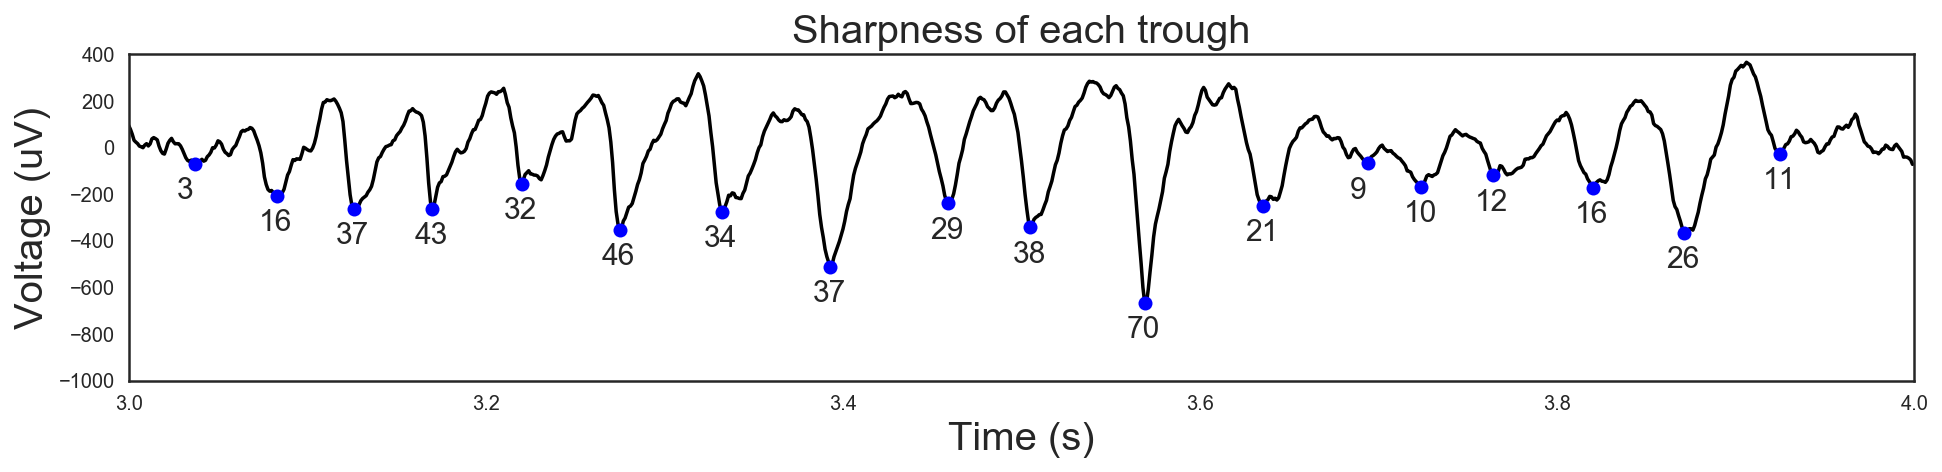

In [6]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'trough_sharp', 'Sharpness of each trough',
                       mark_troughs=True)

### 3b. Period

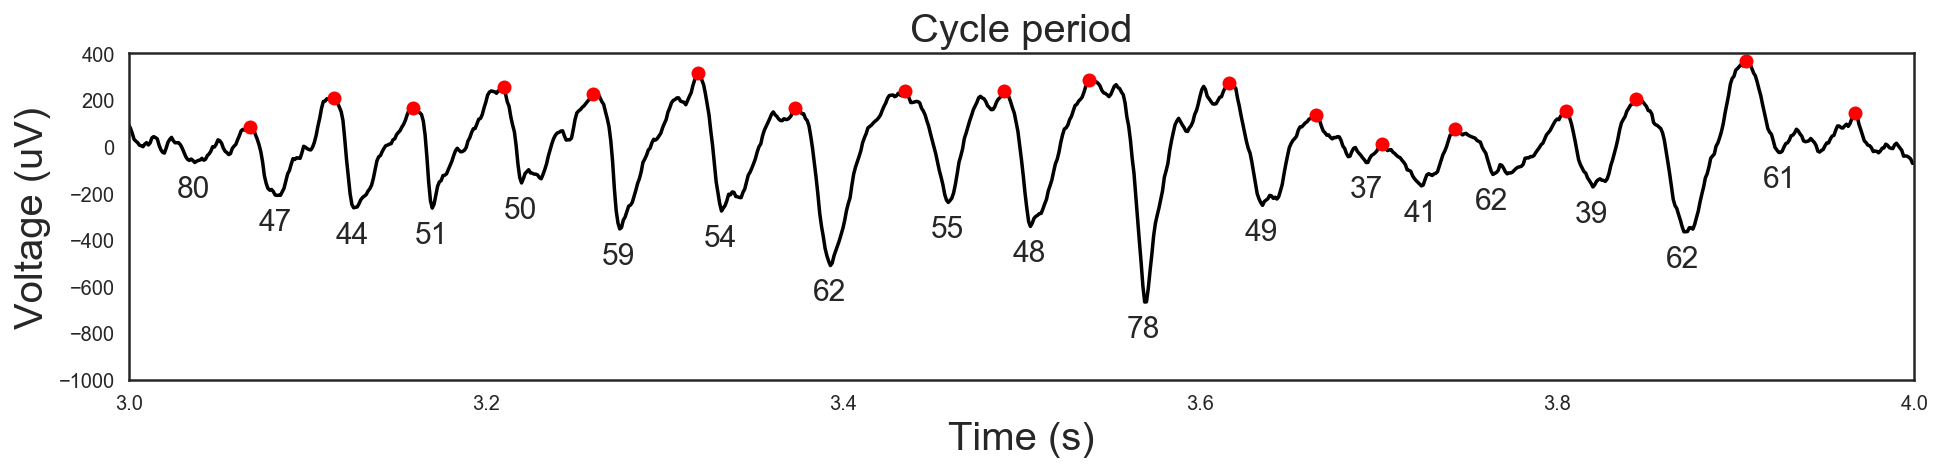

In [7]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'period', 'Cycle period',
                       mark_peaks=True)

### 3c. Rise-decay symmetry

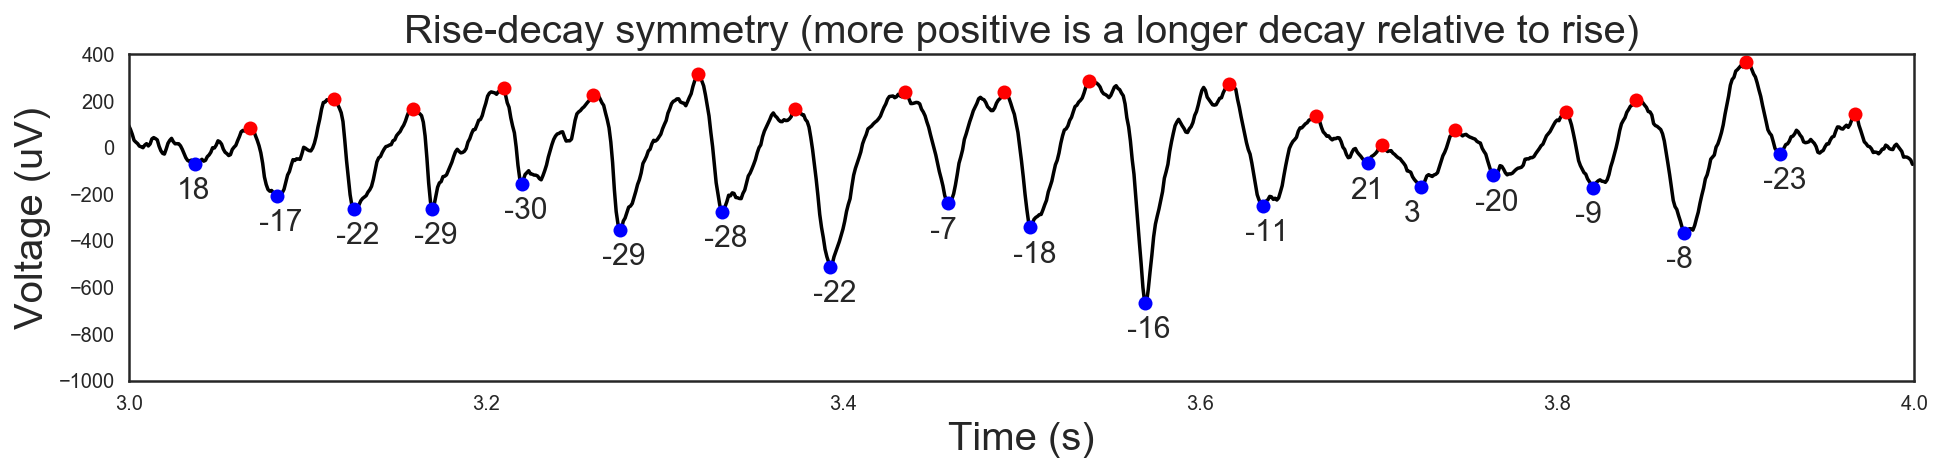

In [8]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'rdsym_time', 'Rise-decay symmetry (more positive is a longer decay relative to rise)',
                       mark_peaks=True, mark_troughs=True)

### 3d. Trough duration

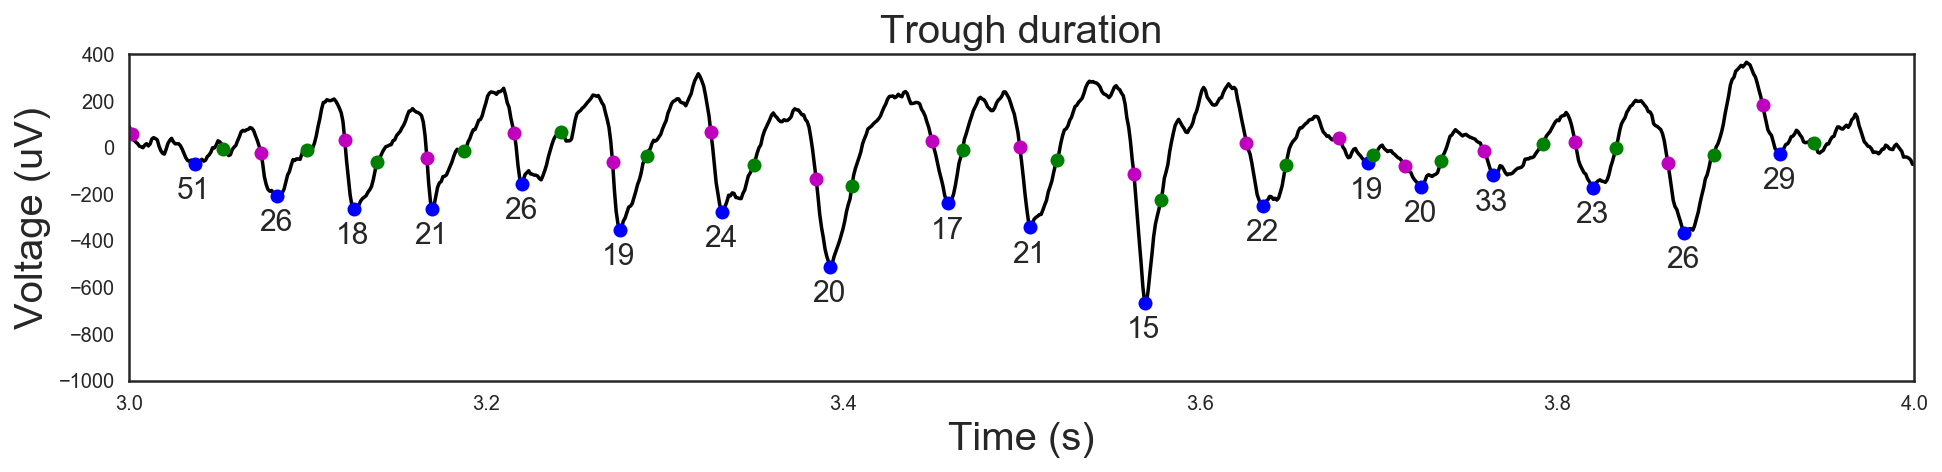

In [9]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'trough_time', 'Trough duration',
                       mark_troughs=True, mark_zeroxR=True, mark_zeroxD=True)

### 3e. Is oscillating?

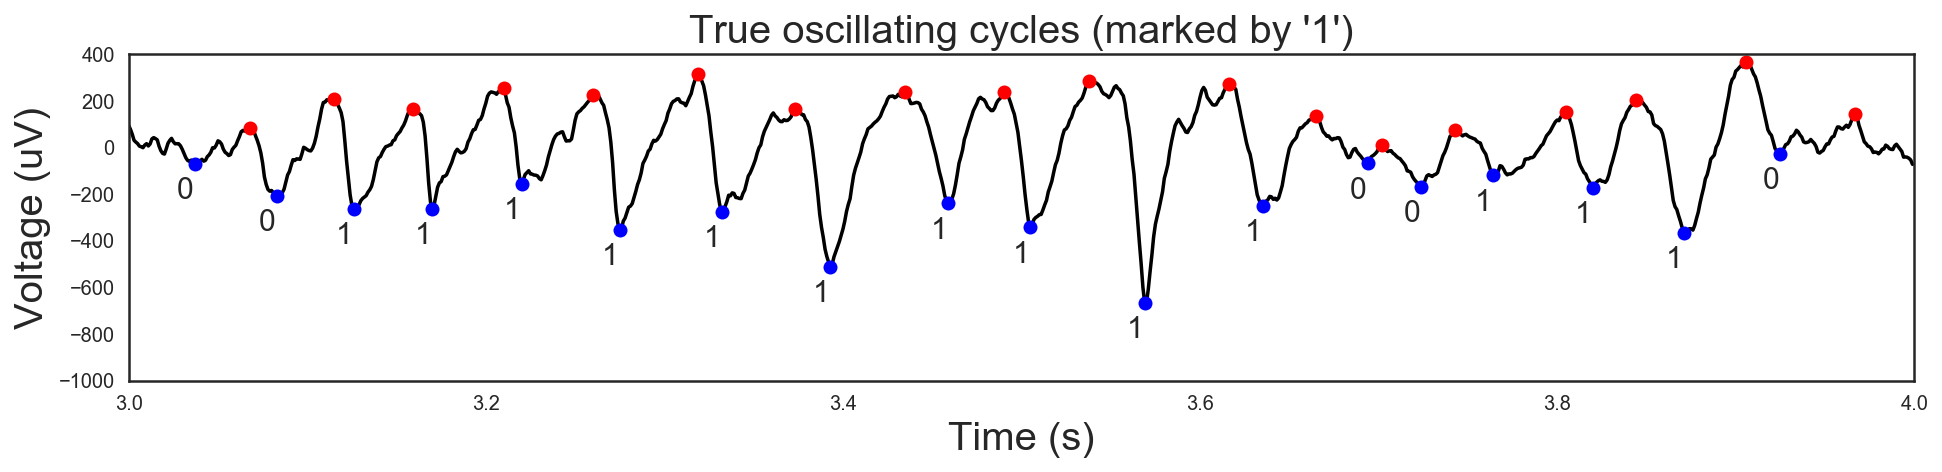

In [10]:
plot_feature_at_trough(df_1sec, x, t, tlim,
                       'oscillating_amp_time', 'True oscillating cycles (marked by \'1\')',
                       mark_troughs=True, mark_peaks=True)